In [1]:
import pandas as pd
import math
import numpy as np
from random import randint

import matplotlib.pyplot as plt
import matplotlib

In [109]:
data = pd.read_csv('data_with_features.csv')
data = data.drop('Unnamed: 0', axis=1)

print(data.shape)
data = data[data['avg_spending_previous_weeks']<300]
data = data[data['previous_amount_spent']<500]
data = data[data['SALES_VALUE']<400]

data = data.sort_values('WEEK_NO')

data = data.dropna().reset_index().drop('index',axis=1)

noise = np.random.normal(0,1,data.shape[0])
noise

noise2 = np.random.normal(0,1,data.shape[0])
noise2

#time spent in shop
data['time_spent_in_shop'] = (data['SALES_VALUE']/10 - data['previous_amount_spent'] + 3*noise + 400) *0.2
data['time_spent_in_shop'] = data['time_spent_in_shop'].apply(lambda x: x+100 if x<0 else x)
min_val = int(data['time_spent_in_shop'].min())
max_val = int(data['time_spent_in_shop'].max())
data['time_spent_in_shop'] = data['time_spent_in_shop'].apply(lambda x: x+100 if x<(randint(min_val,max_val)*0.3) else x)

# difference in fuel price between this shop and the average in the area
data['difference_fuel_price'] = data['SALES_VALUE']/20 *2*data['Monday %'] + 2*noise2

# data['lower_fake'] = data['SALES_VALUE'].apply(lambda x: x if x<50 else randint(30,70))/20 + 10*noise3 + data['previous_amount_spent']
# data['higher_fake'] = data['SALES_VALUE'].apply(lambda x: x if x>50 else randint(30,70))/20 - 10*noise3

print(data.shape)

(123976, 49)
(31712, 51)


In [110]:
weeks_avgs = pd.DataFrame(data.groupby('WEEK_NO')['difference_fuel_price'].mean()).reset_index()
weeks_avgs['difference_fuel_price'] = weeks_avgs['difference_fuel_price']*10-10
weeks_avgs['difference_fuel_price'] = weeks_avgs['difference_fuel_price'].astype(int)
data = data.merge(weeks_avgs, on='WEEK_NO')
data.rename(columns={'difference_fuel_price_y':'difference_fuel_price'}, inplace=True)
data.drop('difference_fuel_price_x', axis=1, inplace=True)
weeks_avgs.head()

,WEEK_NO,difference_fuel_price
0,10,-1
1,11,2
2,12,1
3,13,5
4,14,-1


In [111]:
data['difference_fuel_price'].max()

5

In [112]:
data.sort_values('WEEK_NO')

,household_key,WEEK_NO,SALES_VALUE,month_num,year,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,...,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,previous_amount_spent,month,season,month_x,month_y,time_spent_in_shop,difference_fuel_price
0,718,10,68.09,4,2019,45-54,A,25-34K,Homeowner,5.0,...,9.0,1.0,247.07,247.07,April,spring,0.865927,0.500171,32.073255,-1
1,630,10,16.43,4,2019,35-44,A,35-49K,Homeowner,3.0,...,9.0,1.0,166.56,166.56,April,spring,0.865927,0.500171,47.088668,-1
2,2110,10,258.35,4,2019,35-44,A,125-149K,Homeowner,2.0,...,9.0,1.0,167.54,167.54,April,spring,0.865927,0.500171,52.535268,-1
3,2427,10,35.27,4,2019,35-44,A,50-74K,Homeowner,3.0,...,9.0,1.0,108.44,108.44,April,spring,0.865927,0.500171,59.726008,-1
4,1130,10,59.19,4,2019,55-64,U,25-34K,Renter,3.0,...,9.0,1.0,130.38,130.38,April,spring,0.865927,0.500171,54.828000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31463,2467,102,93.36,3,2020,35-44,A,75-99K,Homeowner,3.0,...,101.0,1.0,168.99,168.99,March,spring,1.000000,0.000296,48.206572,-1
31462,2498,102,37.19,3,2020,25-34,U,50-74K,Homeowner,2.0,...,101.0,1.0,11.98,11.98,March,spring,1.000000,0.000296,78.960433,-1
31461,2483,102,116.65,3,2020,45-54,B,75-99K,Homeowner,1.0,...,101.0,1.0,119.92,119.92,March,spring,1.000000,0.000296,58.913689,-1
31459,2427,102,79.41,3,2020,35-44,A,50-74K,Homeowner,3.0,...,101.0,1.0,91.21,91.21,March,spring,1.000000,0.000296,62.726955,-1


In [113]:
columns_to_predict_on = ['AGE_DESC',
       'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'Adults', 'Child Boolean',
       'Monday %', 'Tuesday %', 'Wednesday %', ' Thursday %', 'Friday %',
       'Saturday %', 'Sunday %', 'morning %', 'afternoon %', 'evening %',
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
        'last_shopping_day', 'days_since_last_shopping',
       'last_shopping_week', 'weeks_since_last_shopping',
       'amount_spent_last_week', 'previous_amount_spent', 'month', 'season',
       'month_x', 'month_y', 
            'time_spent_in_shop',
                         'difference_fuel_price'
#                         'lower_fake','higher_fake'
                        ]



# columns_to_predict_on = ['Monday %', 'Tuesday %', 'Wednesday %',
#        ' Thursday %', 'Friday %', 'Saturday %', 'Sunday %', 'morning %',
#        'afternoon %', 'evening %', 'previous_amount_spent',
#          'weeks_since_last_shopping', 'season', 'month_x', 'month_y',
#        'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
#        'avg_spending_previous_weeks_real_time',
#        'std_spending_previous_weeks_real_time',
#        'var_spending_previous_weeks_real_time',
#        'quan25_spending_previous_weeks_real_time',
#        'quan50_spending_previous_weeks_real_time',
#        'quan75_spending_previous_weeks_real_time',
#        'avg_spending_previous_weeks', 'std_spending_previous_weeks',
#        'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
#        'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
#                          'combination_feature_prevAmount','combination_feature_monday']
#                         # 'lower_fake','higher_fake']


In [114]:
data[columns_to_predict_on].head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,Monday %,Tuesday %,...,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,previous_amount_spent,month,season,month_x,month_y,time_spent_in_shop,difference_fuel_price
0,45-54,A,25-34K,Homeowner,5.0,3.0,2.0,1.0,0.103265,0.310681,...,9.0,1.0,247.07,247.07,April,spring,0.865927,0.500171,32.073255,-1
1,35-44,A,35-49K,Homeowner,3.0,1.0,2.0,1.0,0.118333,0.117222,...,9.0,1.0,166.56,166.56,April,spring,0.865927,0.500171,47.088668,-1
2,35-44,A,125-149K,Homeowner,2.0,0.0,2.0,0.0,0.119642,0.169288,...,9.0,1.0,167.54,167.54,April,spring,0.865927,0.500171,52.535268,-1
3,35-44,A,50-74K,Homeowner,3.0,1.0,2.0,1.0,0.156460,0.199292,...,9.0,1.0,108.44,108.44,April,spring,0.865927,0.500171,59.726008,-1
4,55-64,U,25-34K,Renter,3.0,1.0,2.0,1.0,0.098173,0.120697,...,9.0,1.0,130.38,130.38,April,spring,0.865927,0.500171,54.828000,-1


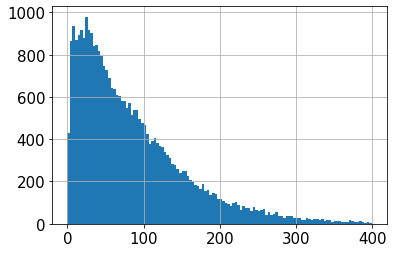

In [115]:
data['SALES_VALUE'].hist(bins=120)

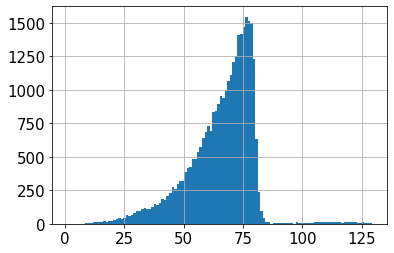

In [116]:
data['time_spent_in_shop'].hist(bins=120)

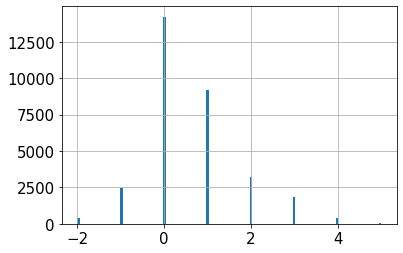

In [117]:
data['difference_fuel_price'].hist(bins=120)

In [118]:
X = data[columns_to_predict_on]

y = data['SALES_VALUE']


In [119]:
X

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,Monday %,Tuesday %,...,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,previous_amount_spent,month,season,month_x,month_y,time_spent_in_shop,difference_fuel_price
0,45-54,A,25-34K,Homeowner,5.0,3.0,2.0,1.0,0.103265,0.310681,...,9.0,1.0,247.07,247.07,April,spring,0.865927,0.500171,32.073255,-1
1,35-44,A,35-49K,Homeowner,3.0,1.0,2.0,1.0,0.118333,0.117222,...,9.0,1.0,166.56,166.56,April,spring,0.865927,0.500171,47.088668,-1
2,35-44,A,125-149K,Homeowner,2.0,0.0,2.0,0.0,0.119642,0.169288,...,9.0,1.0,167.54,167.54,April,spring,0.865927,0.500171,52.535268,-1
3,35-44,A,50-74K,Homeowner,3.0,1.0,2.0,1.0,0.156460,0.199292,...,9.0,1.0,108.44,108.44,April,spring,0.865927,0.500171,59.726008,-1
4,55-64,U,25-34K,Renter,3.0,1.0,2.0,1.0,0.098173,0.120697,...,9.0,1.0,130.38,130.38,April,spring,0.865927,0.500171,54.828000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31707,25-34,U,75-99K,Homeowner,2.0,0.0,2.0,0.0,0.228802,0.075370,...,101.0,1.0,16.21,16.21,March,spring,1.000000,0.000296,78.666785,-1
31708,25-34,B,25-34K,Homeowner,1.0,0.0,1.0,0.0,0.211976,0.164072,...,101.0,1.0,49.48,49.48,March,spring,1.000000,0.000296,70.694637,-1
31709,19-24,U,75-99K,Homeowner,2.0,0.0,2.0,0.0,0.050412,0.067369,...,101.0,1.0,77.16,77.16,March,spring,1.000000,0.000296,65.179681,-1
31710,45-54,A,100-124K,Homeowner,2.0,0.0,1.0,0.0,0.107417,0.095908,...,101.0,1.0,97.18,97.18,March,spring,1.000000,0.000296,60.149426,-1


In [120]:
X = pd.get_dummies(X)

# option 1
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

#option 2
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#option 3
# from sklearn.model_selection import GroupShuffleSplit
# train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 10).split(X, groups=data['household_key']))

# X_train = X.iloc[train_inds]
# y_train = y.iloc[train_inds]
# X_test = X.iloc[test_inds]
# y_test = y.iloc[test_inds]


In [121]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [122]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 21
bst = xgb.train(param, dtrain, num_round, evallist)



[0]	eval-rmse:65.8667	train-rmse:61.7943
[1]	eval-rmse:56.7007	train-rmse:53.2187
[2]	eval-rmse:53.8879	train-rmse:50.8678
[3]	eval-rmse:53.5426	train-rmse:49.9548
[4]	eval-rmse:52.7245	train-rmse:49.0083
[5]	eval-rmse:51.2106	train-rmse:47.4816
[6]	eval-rmse:49.1686	train-rmse:45.33
[7]	eval-rmse:46.1948	train-rmse:42.4264
[8]	eval-rmse:44.6387	train-rmse:40.5641
[9]	eval-rmse:43.6505	train-rmse:39.0732
[10]	eval-rmse:42.4319	train-rmse:37.8761
[11]	eval-rmse:41.9885	train-rmse:37.2531
[12]	eval-rmse:41.9153	train-rmse:36.5988
[13]	eval-rmse:41.1302	train-rmse:35.5994
[14]	eval-rmse:39.9667	train-rmse:34.111
[15]	eval-rmse:39.2592	train-rmse:33.4499
[16]	eval-rmse:39.3137	train-rmse:33.229
[17]	eval-rmse:39.2246	train-rmse:32.9501
[18]	eval-rmse:39.2005	train-rmse:32.7713
[19]	eval-rmse:39.4806	train-rmse:32.6807
[20]	eval-rmse:39.249	train-rmse:32.5895


In [123]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 28.566691397237754
mean squared error: 1540.4798346308262
root mean squared error: 39.24894692384531
R2: 0.7149994594479017


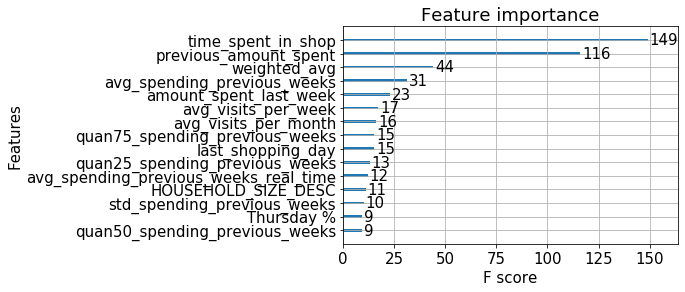

In [124]:
matplotlib.rcParams.update({'font.size': 15})
xgb.plot_importance(bst,max_num_features=15)

In [ ]:
results.head()

In [ ]:
results = pd.DataFrame({ 'real':y_test, 'predicted':preds})#.sort_values(by='real')
results = results.reset_index().drop('index', axis=1)#.head(1000)
results.plot(figsize=(20,10))

In [ ]:
matplotlib.rcParams.update({'font.size': 22})
results.plot(kind='scatter',figsize=(20,10), x='real', y='predicted')

In [ ]:
(data['combination_feature_prevAmount']*-1).plot(figsize=(20,10))

In [ ]:
data['SALES_VALUE'].plot(figsize=(20,10))

In [ ]:
data['combination_feature_monday'].plot(figsize=(20,10))